In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [2]:
# Function to load and clean the dataset
def load_and_preprocess(file_path, sheet_name="Quarterly"):
    df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=2)
    df = df.iloc[:, [1, 2]]  # Keep only relevant columns
    df.columns = ["Date", "HPI Value"]
    df.dropna(inplace=True)
    
    # Convert Date format from 'YYYY-QX' to proper datetime
    df["Date"] = pd.to_datetime(df["Date"].astype(str).str.replace("Q", "") + "-01", format='%Y-%m-%d')
    df.set_index("Date", inplace=True)
    df = df.sort_index()
    
    return df

In [3]:
# Load the dataset
file_path = r"C:\Users\arunk\Downloads\HPI_Data_20241210.xlsx"
df = load_and_preprocess(file_path)


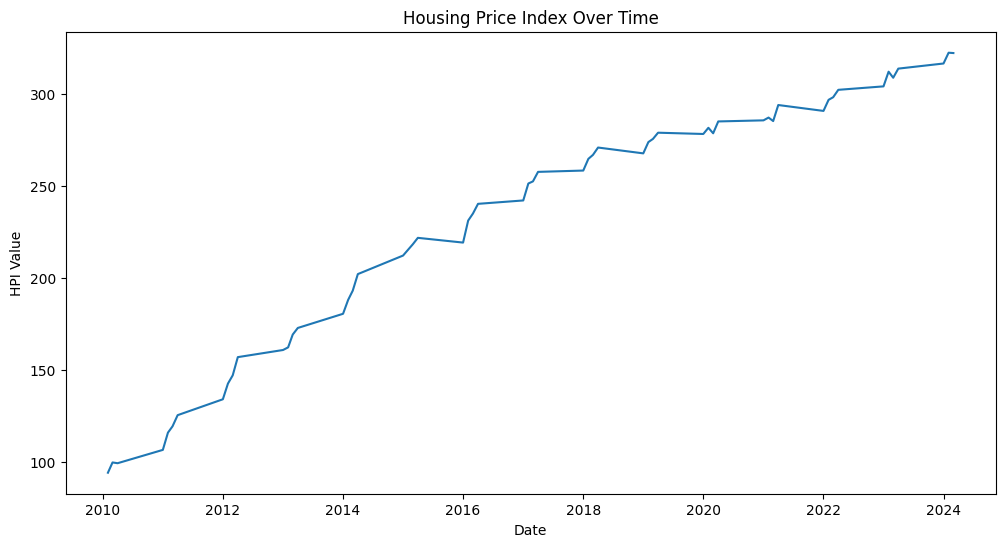

In [4]:
# Exploratory Data Analysis
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y="HPI Value")
plt.title("Housing Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("HPI Value")
plt.show()

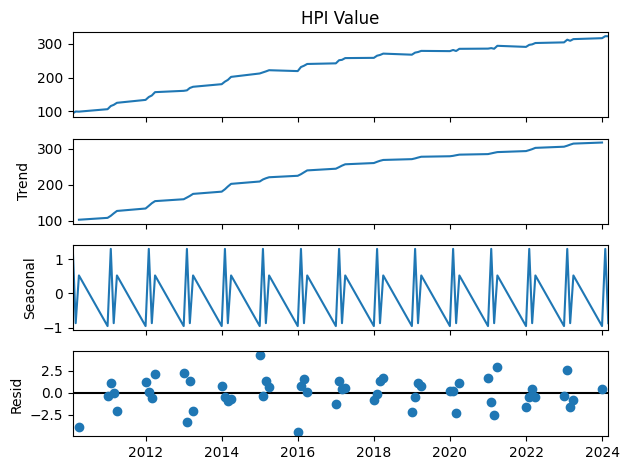

In [5]:
# Seasonal Decomposition
result = seasonal_decompose(df["HPI Value"], model='additive', period=4)
result.plot()
plt.show()


In [6]:
# ARIMA Model for Forecasting
model = auto_arima(df["HPI Value"], seasonal=True, m=4, trace=True, suppress_warnings=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=303.907, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=358.888, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=317.344, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=305.902, Time=0.08 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=298.439, Time=0.31 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=296.445, Time=0.21 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=298.440, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=295.327, Time=0.13 sec
 ARIMA(1,2,2)(1,0,0)[4]             : AIC=297.316, Time=0.27 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=297.313, Time=0.21 sec
 ARIMA(1,2,2)(1,0,1)[4]             : AIC=inf, Time=0.56 sec
 ARIMA(0,2,2)(0,0,0)[4]             : AIC=302.161, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=300.161, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[4]             : AIC=295.850, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=310.290, 

In [7]:
# Forecasting Next 4 Quarters
forecast, conf_int = model.predict(n_periods=4, return_conf_int=True)
forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]


C:\Users\arunk\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\arunk\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


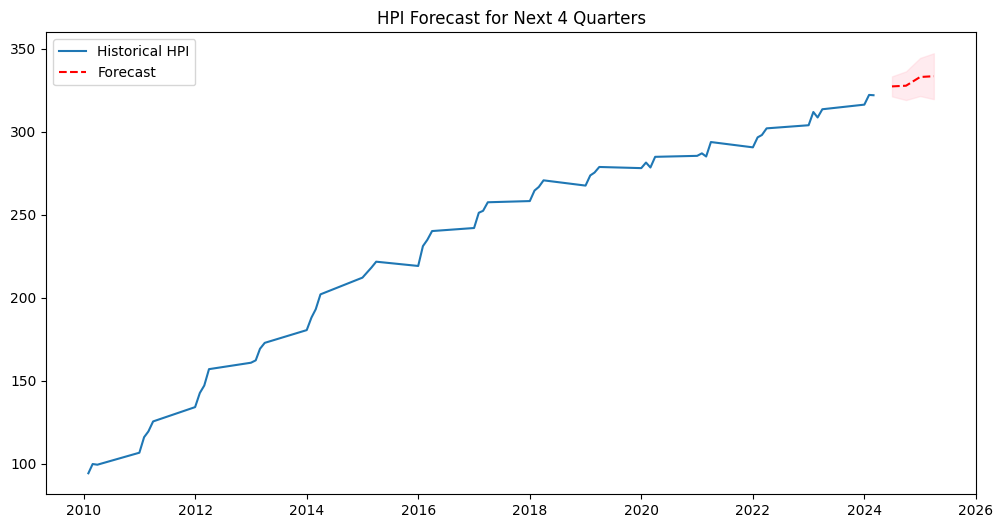

In [8]:
# Plot the Forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df["HPI Value"], label="Historical HPI")
plt.plot(forecast_index, forecast, label="Forecast", linestyle='dashed', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("HPI Forecast for Next 4 Quarters")
plt.show()
